In [1]:
import pandas as pd

In [2]:
url = url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df= pd.read_csv(url,names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# PCA is effected by scaling, so you need to scale the data before you apply PCA.

features = ["sepal length","sepal width","petal length","petal width"]

# separating out features.
x= df.loc[:,features]
print(x.head())

# separating out target.
y= df.loc[:,"target"]
print(y.head())


   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: target, dtype: object


In [10]:
from sklearn.preprocessing import StandardScaler

In [15]:
x=StandardScaler().fit_transform(x)
pd.DataFrame(x).head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [ ]:
# In PCA we are interested in the components that maximize the variance. If one component (e.g. human height) varies less than 
# another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal 
# variance more closely corresponds with the ‘weight’ axis, if those features are not scaled. As a change in height of one meter 
# can be considered much more important than the change in weight of one kilogram, this is clearly incorrect.

In [16]:
# PCA Projection to 2D  
# original data has 4 dimension. PCA will projects points into 2D

from sklearn.decomposition import PCA

In [18]:
pca=PCA(n_components=2)
pca_x = pca.fit_transform(x)
pca_x = pd.DataFrame(pca_x,columns=['principal component 1', 'principal component 2'])
pca_x.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [19]:
# merging the target variable along

final_df=pd.concat([pca_x,y],axis=1)
final_df.head()


,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [21]:
import matplotlib.pyplot as plt

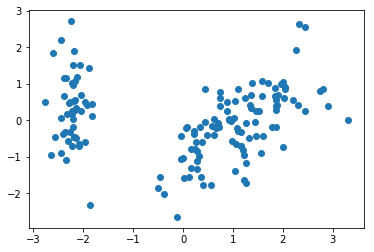

In [30]:
plt.scatter(data=final_df,x="principal component 1",y="principal component 2")

In [33]:
import seaborn as sns  ## Will be easy to plot.

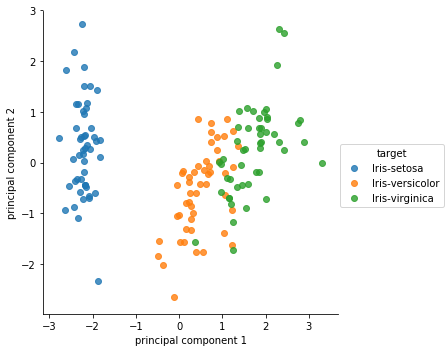

In [35]:
sns.lmplot("principal component 1","principal component 2",data=final_df,hue="target",fit_reg=False)